In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [8]:
# Code for using data in Jupyter Notebook/Labs
# df = pd.read_csv('../Datasets/univariate_profits_and_populations_from_the_cities.csv')
# df.head() # To get first n rows from the dataset default value of n is 5
# M=len(df)
# M

# Code for using csv in google colab
file_path = 'C:/Users/nicocorb/Downloads/ECGR4105/univariate_profits_and_populations_from_the_cities.csv'
df = pd.DataFrame(pd.read_csv(file_path))

# df = pd.read_csv('../Datasets/New folder/univariate_profits_and_populations_from_the_cities.csv')
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)
M


97

In [9]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [10]:
# Separate features and labels
X = df.values[:, 0]  # get input values from first column -- X is a list here
y = df.values[:, 1]  # get output values from second column -- Y is the list here
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X = ', X[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)


X =  [6.1101 5.5277 8.5186 7.0032 5.8598]
y =  [17.592   9.1302 13.662  11.854   6.8233]
m =  97
n =  97


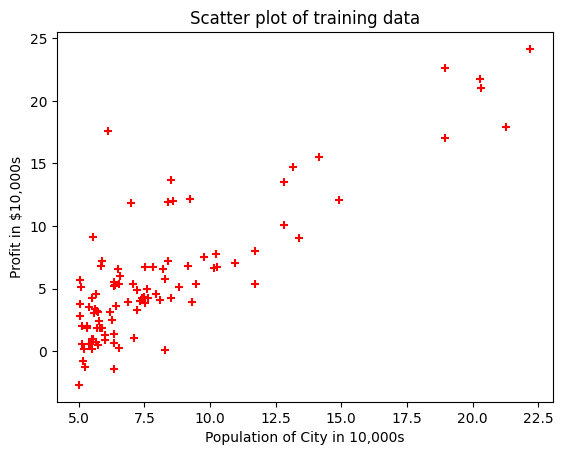

In [11]:
# Scatter plot
plt.scatter(X, y, color='red', marker='+')

# Grid, labels, and title
# plt.grid(True)
plt.rcParams["figure.figsize"] = (10, 10)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Scatter Plotr')

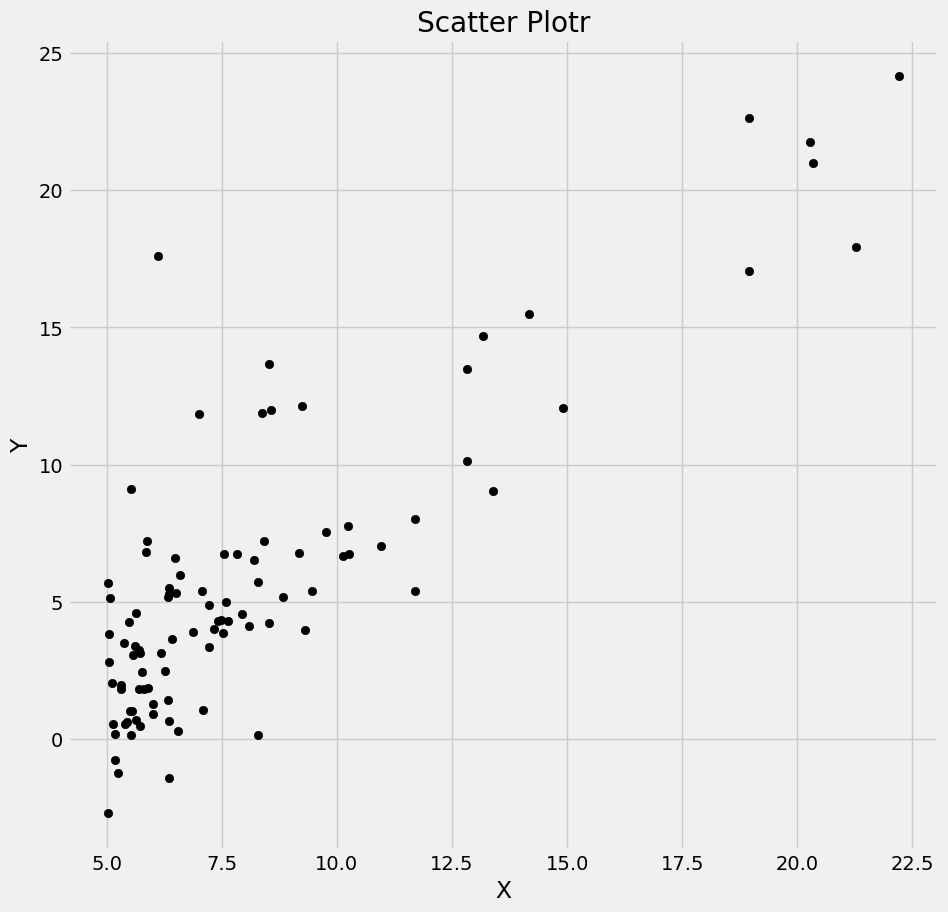

In [12]:
# Another way to plot the data

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(X, y, color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_title("Scatter Plotr")

In [13]:
#We walk through the initial steps of building a linear regression model from scratch using NumPy. Let's break down what you're doing:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
#X_1 = X.reshape(m, 1): You're reshaping features (X) to make it a 2D array suitable for matrix operations.
#X = np.hstack((X_0, X_1)): We're horizontally stacking X_0 and X_1 to create final feature matrix X.


In [14]:
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples

In [15]:
X_0 = np.ones((m, 1)) #We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [16]:
X_1 = X.reshape(m, 1) # You're reshaping features (X) to make it a 2D array suitable for matrix operations.
X_1[:10]

array([[6.1101],
       [5.5277],
       [8.5186],
       [7.0032],
       [5.8598],
       [8.3829],
       [7.4764],
       [8.5781],
       [6.4862],
       [5.0546]])

In [17]:

# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1)) # We're horizontally stacking X_0 and X_1 to create final feature matrix X.
X[:5]


array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [18]:
theta = np.zeros(2)
theta


array([0., 0.])

In [19]:
def compute_cost(X, y, theta):
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(1 x m)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 Output Parameters
 -----------------
 J : Scalar value.
 """
 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute cost for linear regression.
    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(m x 1)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)
    alpha : Learning rate. Scalar value
    iterations: No of iterations. Scalar value.
    Output Parameters
    -----------------
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
    cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
    """
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history


In [20]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)


The cost for given values of theta_0 and theta_1 = 32.072733877455676


In [149]:

theta = [-0.25, 0.75]
iterations = 15000;
alpha = 0.005;

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)


Final value of theta = [-3.89578088  1.19303364]
cost_history = [6.73719046 5.93159357 5.90115471 ... 4.47697138 4.47697138 4.47697138]


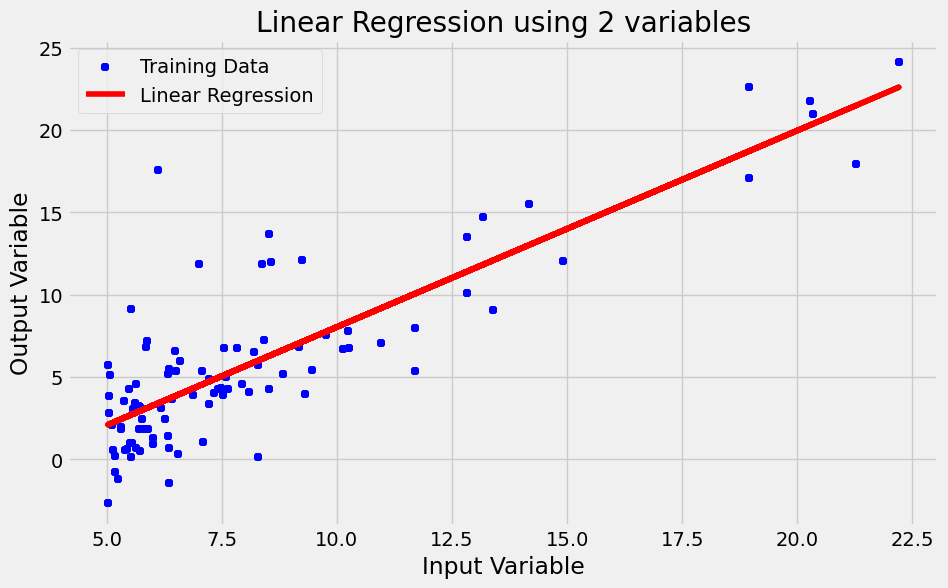

In [150]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='b', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='r', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)

plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.title('Linear Regression using 2 variables')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

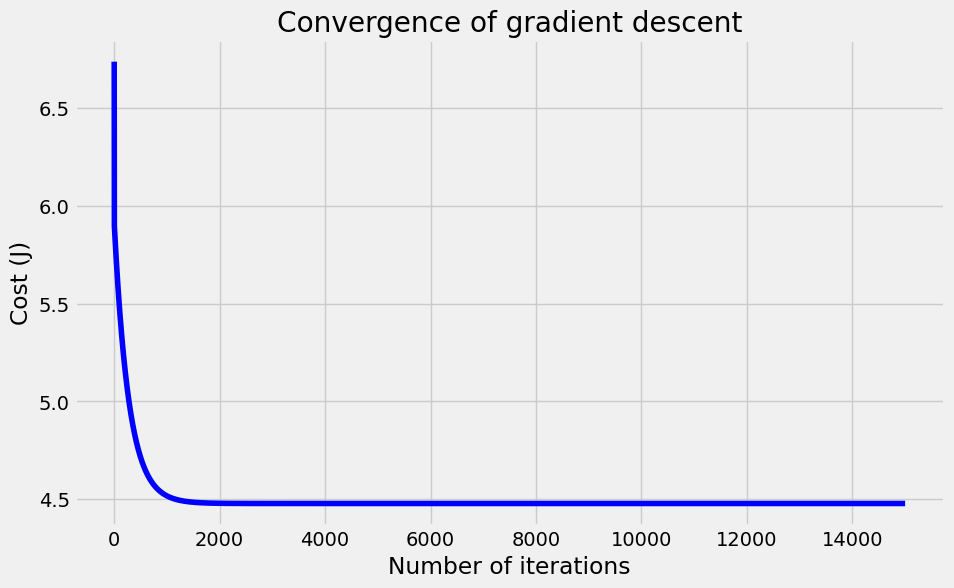

In [151]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
# plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

## Next change the iterations and learning rate (alpha) and try to take loss to minimum